In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize
import scipy.interpolate
from mpl_toolkits.mplot3d import Axes3D

In [2]:
h = 0.5
x = np.arange(-6,6+h,h)
y = np.arange(-6,6+h,h)

X,Y = np.meshgrid(x,y)
F0 = 1.5 - 1.0*np.exp(-0.03*(3*np.power(X,2)+np.power(Y,2)))
F = 1.5 - 1.6*np.exp(-0.05*(3*np.power(X,2)+np.power(Y+3,2)))
F2 = F + (0.5 - 1.0*np.exp(-0.1*(3*np.power(X-3,2)+np.power(Y-3,2))))

dF0y,dF0x = np.gradient(F0,h,h) 
dF2y,dF2x = np.gradient(F2,h,h) 

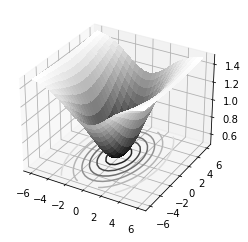

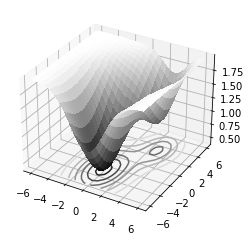

In [3]:
# Figure 4.3a
fig,axs = plt.subplots(1,1,subplot_kw={'projection': '3d'})
axs.plot_surface(X, Y, F0, cmap='gray',linewidth=0, antialiased=False)
axs.contour(X, Y, F0, zdir='z', offset=axs.get_zlim()[0], cmap='gray')
plt.show()

# Figure 4.3b
fig,axs = plt.subplots(1,1,subplot_kw={'projection': '3d'})
axs.plot_surface(X, Y, F2, cmap='gray',linewidth=0, antialiased=False)
axs.contour(X, Y, F2, zdir='z', offset=axs.get_zlim()[0], cmap='gray')
plt.show()

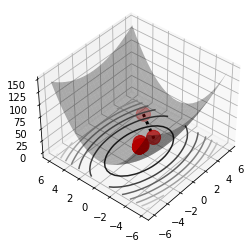

In [4]:
# Fig. 4.4 - Gradient Descent
x = np.zeros(10)
y = np.zeros(10)
f = np.zeros(10)

Fquad = np.power(X,2) + 3*np.power(Y,2)

x[0] = 3  # Initial guess
y[0] = 2 

f[0] = x[0]**2 + 3*y[0]**2 # Initial function value - Eq. 4.39

for j in range(len(x)-1):
    Del = (x[j]**2 + 9*y[j]**2)/(2*x[j]**2 + 54*y[j]**2) # Eq. 4.37
    x[j+1] = (1 - 2*Del)*x[j] # update values - Eq. 4.34
    y[j+1] = (1 - 6*Del)*y[j] # Eq. 4.34
    f[j+1] = x[j+1]**2 + 3*y[j+1]**2 # Eq. 4.39
    
    if np.abs(f[j+1]-f[j]) < 10**(-6): # check convergence
        x = x[:j+2]
        y = y[:j+2]
        f = f[:j+2]
        break

fig,ax = plt.subplots(1,1,subplot_kw={'projection': '3d'})
ax.plot_surface(X, Y, Fquad,linewidth=0,color='k',alpha=0.3)
ax.scatter(x,y,f,'o',color='r',s=200)
ax.plot(x,y,f,':',color='k',linewidth=3)
ax.contour(X, Y, Fquad, zdir='z', offset=ax.get_zlim()[0], cmap='gray')
ax.view_init(elev=40, azim=-140)
plt.show()

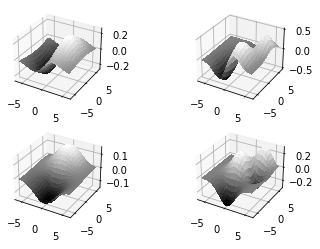

In [5]:
# Fig. 4.5
fig,axs = plt.subplots(2,2,subplot_kw={'projection': '3d'})
axs = axs.reshape(-1)
axs[0].plot_surface(X, Y, dF0x, cmap='gray',linewidth=0, antialiased=False)
axs[2].plot_surface(X, Y, dF0y, cmap='gray',linewidth=0, antialiased=False)
axs[1].plot_surface(X, Y, dF2x, cmap='gray',linewidth=0, antialiased=False)
axs[3].plot_surface(X, Y, dF2y, cmap='gray',linewidth=0, antialiased=False)
plt.show()